In [65]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from word2number import w2n

In [66]:
TrainDataSet = pd.read_csv('./datasets/train_kaggle.csv')

TrainDataSet.info()

C:\Users\Acer\AppData\Local\Temp\ipykernel_8348\1880558860.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  TrainDataSet = pd.read_csv('./datasets/train_kaggle.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [67]:
print(f'Before Cleaning the Sales Column {TrainDataSet.isnull().sum()}')

# Check for missing values
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']].fillna(0)

print(f'\nAfter Cleaning the Sales Column {TrainDataSet.isnull().sum()}')

Before Cleaning the Sales Column Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

After Cleaning the Sales Column Customer_ID         2
outlet_city         2
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    1
dtype: int64


In [68]:
TrainDataSet.dropna(inplace=True)

TrainDataSet.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

In [69]:
# Data type correction
# Assuming TrainDataSet is your DataFrame and 'sales' is the column name
# Convert non-numeric values to NaN for multiple columns
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']].apply(pd.to_numeric, errors='coerce')

# Convert the columns to float
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']].astype(float)

TrainDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774150 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774150 non-null  float64
 1   outlet_city       774150 non-null  object 
 2   luxury_sales      774140 non-null  float64
 3   fresh_sales       774141 non-null  float64
 4   dry_sales         774142 non-null  float64
 5   cluster_catgeory  774150 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB


In [70]:
TrainDataSet.replace({'luxury_sales': {'Nan': 0} , 'fresh_sales': {'Nan': 0}, 'dry_sales': {'Nan': 0}}, inplace=True)

# Convert the columns to float
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']].astype(float)

TrainDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774150 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774150 non-null  float64
 1   outlet_city       774150 non-null  object 
 2   luxury_sales      774140 non-null  float64
 3   fresh_sales       774141 non-null  float64
 4   dry_sales         774142 non-null  float64
 5   cluster_catgeory  774150 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB


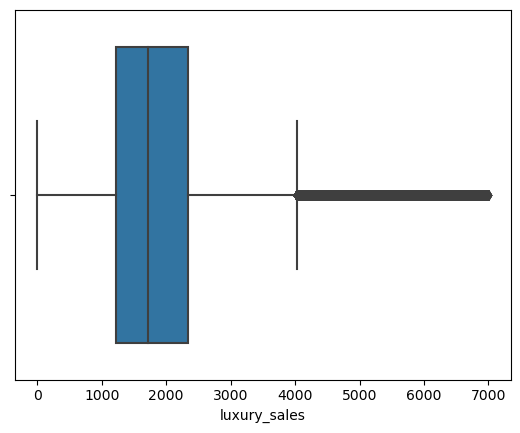

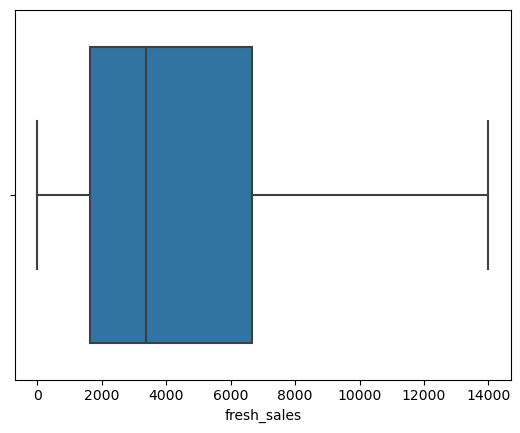

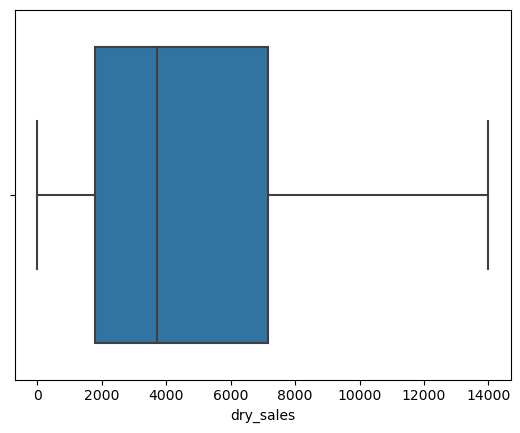

In [72]:
# Outliers
# Check for outliers
sns.boxplot(x=TrainDataSet['luxury_sales'])
plt.show()

sns.boxplot(x=TrainDataSet['fresh_sales'])
plt.show()

sns.boxplot(x=TrainDataSet['dry_sales'])
plt.show()

In [3]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Sample data
data = {
    'luxury_sales': [1000, 1200, 800, 1500, 2000, 10000],  # Adding an outlier (10000) to luxury_sales
    'fresh_sales': [500, 600, 700, 800, 900, 3000],        # Adding an outlier (3000) to fresh_sales
    'dry_sales': [200, 300, 400, 500, 600, 4000]           # Adding an outlier (4000) to dry_sales
}

# Create DataFrame
TrainDataSet = pd.DataFrame(data)
print("Original Data:")
print(TrainDataSet)

# Initialize the RobustScaler object
scaler = RobustScaler()

# Fit the scaler to your data and transform the features
scaled_features = scaler.fit_transform(TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']])

# Replace the original features with the scaled features
TrainDataSet[['luxury_sales', 'fresh_sales', 'dry_sales']] = scaled_features

print("Scaled Data:")
print(TrainDataSet)

Original Data:
   luxury_sales  fresh_sales  dry_sales
0          1000          500        200
1          1200          600        300
2           800          700        400
3          1500          800        500
4          2000          900        600
5         10000         3000       4000
Scaled Data:
   luxury_sales  fresh_sales  dry_sales
0     -0.424242         -1.0       -1.0
1     -0.181818         -0.6       -0.6
2     -0.666667         -0.2       -0.2
3      0.181818          0.2        0.2
4      0.787879          0.6        0.6
5     10.484848          9.0       14.2
